In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

# Load data

In [2]:
X_train = np.loadtxt('input_test.csv',delimiter=',')
Y_train = np.loadtxt('labels_test.csv',delimiter=',')

X_test = np.loadtxt('input_test.csv',delimiter=',')
Y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [3]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255;
X_test = X_test/255

In [4]:
print("Shape of the X_Train:",X_train.shape)
print("Shape of the Y_Train:",Y_train.shape)
print("Shape of the X_Test:",X_test.shape)
print("Shape of the Y_Test",Y_test.shape)


Shape of the X_Train: (400, 100, 100, 3)
Shape of the Y_Train: (400, 1)
Shape of the X_Test: (400, 100, 100, 3)
Shape of the Y_Test (400, 1)


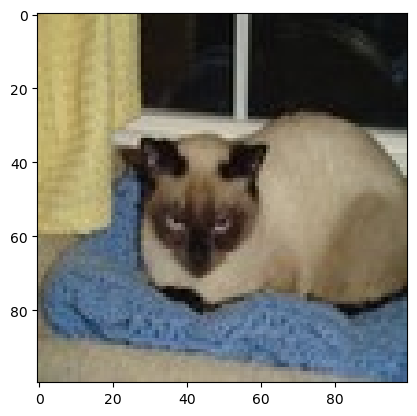

In [5]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

# Model 

In [6]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation = 'sigmoid')
    
])

C:\Users\spgir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [8]:
model.compile(loss ='binary_crossentropy',optimizer='adam',metrics =['accuracy'])
                                                                    

In [9]:
model.fit(X_train,Y_train,epochs=10,batch_size=64)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.5700 - loss: 1.0669
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.5017 - loss: 0.7028
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.4901 - loss: 0.6926
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 0.5262 - loss: 0.6918
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.6152 - loss: 0.6899
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.5838 - loss: 0.6802
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.6615 - loss: 0.6557
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.7055 - loss: 0.6166
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.7329 - loss: 0.5641
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.6380 - loss: 0.5996


In [10]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7522 - loss: 0.5398


[0.49860861897468567, 0.8224999904632568]

# Making Prediction

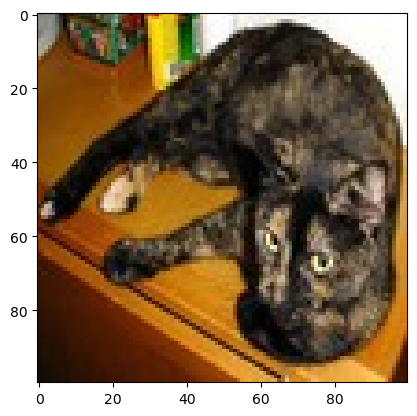

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
Our model says it is a : cat


In [11]:
indx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[indx2,:])
plt.show()

y_pred = model.predict(X_test[indx2,:].reshape(1,100,100,3))
y_pred = y_pred >0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :",pred)